In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
random.seed(1)
tf.random.set_seed(1)

In [3]:
df = pd.read_excel('phase_sheet.xlsx')
data = df.to_numpy()
X = data[:,list(range(25))]
Y = data[:,25]
Y = Y - 1
Y = Y.astype(int)
X = X.astype(int)

print(f'The shape of input X is {X.shape}')
print(f'The shape of output Y is {Y.shape}')

The shape of input X is (383, 25)
The shape of output Y is (383,)


In [4]:
X_train = X
Y_train = Y
X_temp, X_, Y_temp, Y_= train_test_split(X, Y, test_size=0.30, random_state = 23)
X_cv,X_test,Y_cv,Y_test = train_test_split(X_, Y_, test_size=0.50, random_state = 23)
print(f'The shape of training set(input) is: {X_train.shape}')
print(f'The shape of training set(output) is: {Y_train.shape}')
print(f'The shape of CV set(input) is: {X_cv.shape}')
print(f'The shape of CV set(output) is: {Y_cv.shape}')
print(f'The shape of test set(input) is: {X_test.shape}')
print(f'The shape of test set(output) is: {Y_test.shape}')

The shape of training set(input) is: (383, 25)
The shape of training set(output) is: (383,)
The shape of CV set(input) is: (57, 25)
The shape of CV set(output) is: (57,)
The shape of test set(input) is: (58, 25)
The shape of test set(output) is: (58,)


In [5]:
best_model = Sequential(
    [               
        tf.keras.layers.InputLayer((25,)),
        tf.keras.layers.Dense(30, activation="sigmoid", name="L1"),
        tf.keras.layers.Dense(25, activation="sigmoid", name="L2"),
        tf.keras.layers.Dense(20, activation="sigmoid", name="L3"),
        tf.keras.layers.Dense(20, activation="linear", name="L4")
    ], name = "my_model" 
)
best_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

best_history = best_model.fit(
    X_train,Y_train,
    validation_data=(X_cv, Y_cv),
    epochs=1000,
    verbose=0
)

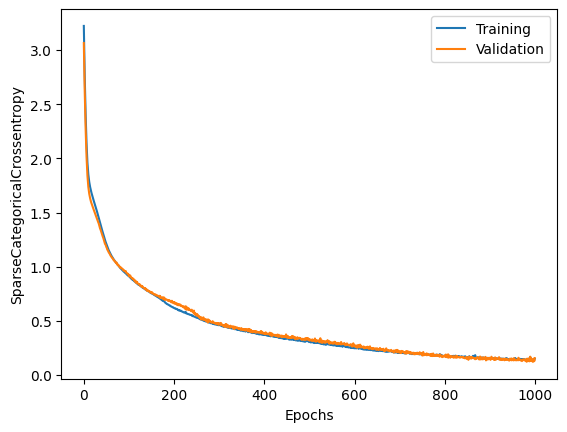

In [6]:
# Plot training, validation, and test loss vs. epochs
plt.plot(best_history.history['loss'], label='Training')
plt.plot(best_history.history['val_loss'], label='Validation')
# plt.axhline(y=test_loss, color='r', linestyle='--', label='Test')
plt.xlabel('Epochs')
plt.ylabel('SparseCategoricalCrossentropy')
plt.savefig('nn/loss.png')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import accuracy_score
Y_train_dash = best_model.predict(X_train)
Y_train_hat = tf.argmax(Y_train_dash, axis=1).numpy()
train_accuracy = accuracy_score(Y_train,Y_train_hat)
print(f'Training Accuracy: {train_accuracy}')

Y_cv_dash = best_model.predict(X_cv)
Y_cv_hat = tf.argmax(Y_cv_dash, axis=1).numpy()
val_accuracy = accuracy_score(Y_cv,Y_cv_hat)
print(f'Validation Accuracy: {val_accuracy}')

Y_test_dash = best_model.predict(X_test)
Y_test_hat = tf.argmax(Y_test_dash, axis=1).numpy()
test_accuracy = accuracy_score(Y_test,Y_test_hat)
print(f'Testing Accuracy: {test_accuracy}')

12/12 [==============================] - 0s 2ms/step
Training Accuracy: 0.9477806788511749
2/2 [==============================] - 0s 4ms/step
Validation Accuracy: 0.9473684210526315
2/2 [==============================] - 0s 6ms/step
Testing Accuracy: 0.9137931034482759


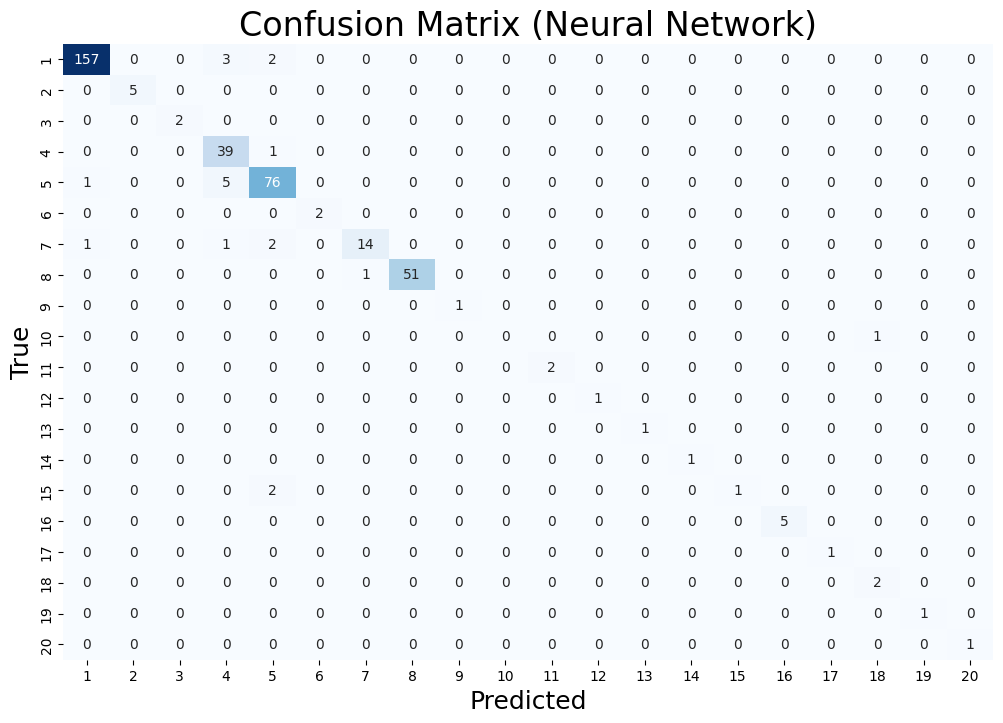

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming your predictions are stored in 'y_pred'
conf_matrix = confusion_matrix(Y_train, Y_train_hat)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adding 1 to class labels for display purposes
class_labels = [str(i) for i in range(1, 21)]
plt.xticks(ticks=[i + 0.5 for i in range(20)], labels=class_labels)
plt.yticks(ticks=[i + 0.5 for i in range(20)], labels=class_labels)

plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)
plt.title('Confusion Matrix (Neural Network)', fontsize=24)
plt.savefig('nn/cf.png')
plt.show()

12/12 [==============================] - 0s 2ms/step


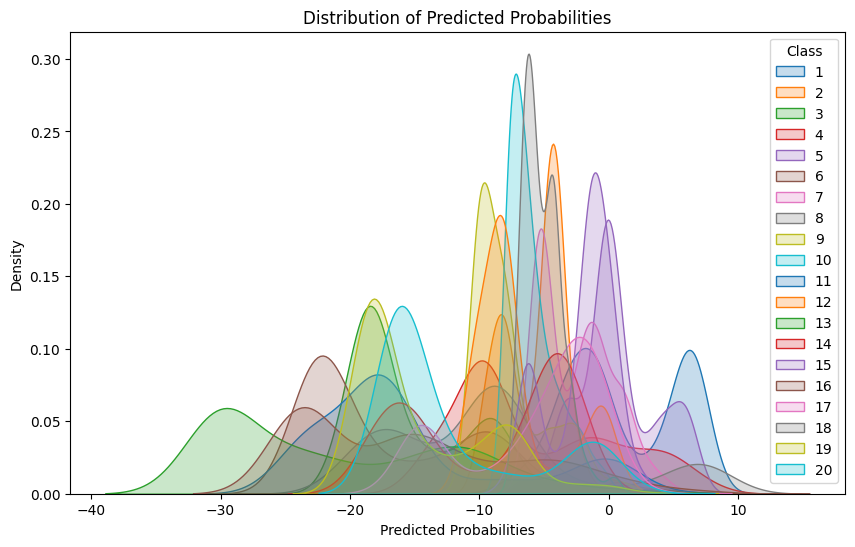

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_scores' contains the predicted probabilities
y_scores = best_model.predict(X_train)

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot the KDE plot
for i in range(20):
    sns.kdeplot(data=y_scores[:, i], label=str(i + 1), fill=True)

plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')

# Add a legend
plt.legend(title='Class')
plt.show()


In [10]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'X' is your feature matrix (DataFrame or numpy array)
# df_ = df.iloc[:, -5:]
# df_['Phase'] = df['Phase'].astype('category')
# color_palette = sns.color_palette('husl', n_colors=20)
# sns.pairplot(df_, hue='Phase', palette=color_palette)
# plt.show()


In [11]:
import math

train_accuracy = math.floor(train_accuracy * 100) / 100
print(train_accuracy)

val_accuracy = math.floor(val_accuracy * 100) / 100
print(val_accuracy)

test_accuracy = math.floor(test_accuracy * 100) / 100
print(test_accuracy)

0.94
0.94
0.91


In [12]:
from openpyxl import Workbook
from openpyxl.utils import get_column_letter

wb = Workbook()
ws = wb.active

j = 1

ws[str(get_column_letter(j)) + str(1)].value = 'Train_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = train_accuracy

j += 1

ws[str(get_column_letter(j)) + str(1)].value = 'Val_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = val_accuracy

j += 1

ws[str(get_column_letter(j)) + str(1)].value = 'test_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = test_accuracy

j += 1

wb.save('nn/result.xlsx')
print('Done')

Done


In [14]:
best_model.save('nn/nn.keras')